In [57]:
import sys
sys.path
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

import os
print(os.getcwd())
os.environ.update(os.environ)
# Add a new environment variable to the operating system
os.environ["RAMP_HOME"] = os.getcwd()
# Print the environment variables to verify that the new variable was added
print(os.environ["RAMP_HOME"])
# sys.path.append('../')
sys.path.append('ramp-code/')

# used later on in the script:
import datetime
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import warnings
warnings.filterwarnings("ignore")
# initialise keras
os.environ["SM_FRAMEWORK"] = "tf.keras"

Num GPUs Available:  1
/home/annazan/fAIr-utilities/outputs/accuracies
/home/annazan/fAIr-utilities/outputs/accuracies


In [58]:
### defining path variables
# base_path = "/Users/azanchetta/fAIr-utilities" # this path is used in all the rest of the code, so change accordingly
base_path = '/home/annazan/fAIr-utilities/'

print(f"\n---\nCurrent working directory {base_path}")
history_dir = f'{base_path}/outputs/accuracies/'

dir_list = os.listdir(history_dir)
print(dir_list)
# from pathlib import Path

# Path(dir_list).stem




---
Current working directory /home/annazan/fAIr-utilities/
['model114_td399_bch8_epc20.csv', 'graph_model98_td373_bch16_epc20.png', 'model110_td394_bch8_epc20.csv', 'history_model112_td397_bch2_epc20.npy', 'graph_model114_td399_bch16_epc20.png', 'graph_model112_td397_bch2_epc20.png', 'graph_model97_td372_bch4_epc20.png', 'graph_model95_td370_bch2_epc20.png', 'history_model113_td398_bch16_epc20.npy', 'model112_td397_bch4_epc20.csv', 'history_model113_td398_bch2_epc20.npy', 'graph_model113_td398_bch8_epc20.png', 'model51_td364_bch2_epc20.csv', 'graph_model112_td397_bch4_epc20.png', 'model98_td373_bch4_epc20.csv', 'model114_td399_bch2_epc20.csv', 'history_model97_td372_bch2_epc20.npy', 'history_model98_td373_bch2_epc20.npy', 'history_model110_td394_bch8_epc20.npy', 'model51_td364_bch4_epc20.csv', 'history_model51_td364_bch2_epc20.npy', 'graph_model51_td364_bch8_epc20.png', 'graph_model110_td394_bch16_epc20.png', 'graph_model95_td370_bch16_epc20.png', 'model113_td398_bch4_epc20.csv', 'gr

In [ ]:
import glob, os
os.chdir(history_dir)
files_list = []
for file in glob.glob("*.npy"):
    files_list.append(file)
    print(file)

In [ ]:
import seaborn as sns

In [ ]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}/{name}'
    
    # load the history
    history_saved=np.load(history_name_with_path,allow_pickle='TRUE').item()
    # history_saved.keys()

    # save to dataframe
    history_saved_df = pd.DataFrame.from_dict(history_saved)
    # history_saved_df

    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}/{graph_file_name}'

    loss = history_df[:,"loss"]
    # val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)

    # acc = history.history["sparse_categorical_accuracy"]
    # val_acc = history.history["val_sparse_categorical_accuracy"]

    #---
    acc =  history_df[:,"categorical_accuracy"]
    val_acc =  history_df[:,"val_categorical_accuracy"]
    acc1 =  history_df[:,"recall_1"]
    val_acc1 = history.history["val_recall_1"]
    acc2 =  history_df[:,"precision_1"]
    val_acc2 = history.history["val_precision_1"]
    acc3 = history.history["ohe_iou"]
    val_acc3 = history.history["val_ohe_iou"]
    loss = history.history["loss"]
    #---


    # Plot training and validation accuracy
    plt.plot(epochs, acc, "y", label="Train cat accuracy")
    plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
    plt.plot(epochs, acc1, "b", label="Train recall")
    plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
    plt.plot(epochs, acc2, "c", label="Train precision")
    plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
    plt.plot(epochs, acc3, "r", label="Train IoU")
    plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
    plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")


    # Set labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

    plt.legend()
    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # clearing up the plot the figure for next plot
    plt.clf()
    plt.cla()
    plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/how-to-forget-previous-plots-how-can-i-flush-refresh


In [ ]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}/{name}'
    csv_name_with_path = f'{history_dir}/{name_noextension}.csv'
    
    # load the history and save to df
    history_df=pd.read_csv(csv_name_with_path)

    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}/{graph_file_name}'

    loss =  history_df.loc[:,"loss"]
    epochs = range(1, len(loss) + 1)
    #---
    acc = history_df.loc[:,"categorical_accuracy"]
    val_acc = history_df.loc[:,"val_categorical_accuracy"]
    acc1 = history_df.loc[:,"recall_1"]
    val_acc1 = history_df.loc[:,"val_recall_1"]
    acc2 = history_df.loc[:,"precision_1"]
    val_acc2 = history_df.loc[:,"val_precision_1"]
    acc3 = history_df.loc[:,"ohe_iou"]
    val_acc3 = history_df.loc[:,"val_ohe_iou"]
    # loss = history_df.loc[:,"loss"]
    #---

    # Plot training and validation accuracy
    plt.plot(epochs, acc, "y", label="Train cat accuracy")
    plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
    plt.plot(epochs, acc1, "b", label="Train recall")
    plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
    plt.plot(epochs, acc2, "c", label="Train precision")
    plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
    plt.plot(epochs, acc3, "r", label="Train IoU")
    plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
    plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")


    # Set labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

    plt.legend()
    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # clearing up the plot the figure for next plot
    plt.clf()
    plt.cla()
    plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/

In [171]:
import seaborn as sns

In [ ]:
for name in files_list:
    print(f'name is: {name}')
    name_parts = name.split("_")
    # print(f'name is: {name_parts}')
    city = f'{name_parts[1]}_{name_parts[2]}'
    # print(f'city {city}')
    name_for_graph = f'{city}_{name_parts[3]}_{name_parts[4]}'
    name_noextension = name_for_graph.split(".")[0]
    print(name_noextension)
    
    history_name_with_path = f'{history_dir}/{name}'
    csv_name_with_path = f'{history_dir}/{name_noextension}.csv'
    
    # load the history and save to df
    history_df=pd.read_csv(csv_name_with_path)

    # plot the training and validation accuracy and loss at each epoch
    print("Generating graphs ....")
    # graph_file_name = f'graph_{city}_bch{n_of_batches}_epc{n_of_epochs}.png'
    graph_file_name = f'graph_{name_noextension}.png'
    graph_output = f'{history_dir}/{graph_file_name}'

    loss =  history_df.loc[:,"loss"]
    epochs = range(1, len(loss) + 1)
    #---
    acc = history_df.loc[:,"categorical_accuracy"]
    val_acc = history_df.loc[:,"val_categorical_accuracy"]
    acc1 = history_df.loc[:,"recall_1"]
    val_acc1 = history_df.loc[:,"val_recall_1"]
    acc2 = history_df.loc[:,"precision_1"]
    val_acc2 = history_df.loc[:,"val_precision_1"]
    acc3 = history_df.loc[:,"ohe_iou"]
    val_acc3 = history_df.loc[:,"val_ohe_iou"]
    # loss = history_df.loc[:,"loss"]
    #---

    # Plot training and validation accuracy
    plt.style.use('seaborn-darkgrid')
    plt.plot(epochs, acc, "y", label="Train cat accuracy")
    plt.plot(epochs, val_acc, "y", linestyle='dashed', label="Valid cat accuracy")
    plt.plot(epochs, acc1, "b", label="Train recall")
    plt.plot(epochs, val_acc1, "b", linestyle='dashed', label="Valid recall")
    plt.plot(epochs, acc2, "c", label="Train precision")
    plt.plot(epochs, val_acc2, "c", linestyle='dashed', label="Valid precision")
    plt.plot(epochs, acc3, "r", label="Train IoU")
    plt.plot(epochs, val_acc3, "r", linestyle='dashed', label="Valid Iou")
    plt.plot(epochs, loss, "m", linestyle='dotted', label="Loss")

    # Set labels and title
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")

    plt.legend()
    plt.savefig(
        f"{graph_output}"
    )
    print(f"Graph generated at : {graph_output}")
    plt.show()
    
    # clearing up the plot the figure for next plot
    plt.clf()
    plt.cla()
    plt.close() # clear the plot to avoid overlapping figures! https://stackoverflow.com/questions/17106288/

In [157]:
df_for_plot=history_df.iloc[:,1:11]

In [165]:
# convert to long (tidy) form
history_df.assign(epoch=range(1, len(loss) + 1))
dfm = history_df.melt('Unnamed: 0', var_name='cols', value_name='vals')



In [166]:
dfm = dfm.assign(type='train')
dfm.loc[(len(dfm.index)/2):len(dfm.index),'type'] = 'valid'

In [167]:
dfm = dfm.assign(metric='Loss')
dfm.loc[20:39,'metric'] = 'Precision'
dfm.loc[120:139,'metric'] = 'Precision'
dfm.loc[40:59,'metric'] = 'Recall'
dfm.loc[140:159,'metric'] = 'Recall'
dfm.loc[60:79,'metric'] = 'IoU'
dfm.loc[160:179,'metric'] = 'IoU'
dfm.loc[80:99,'metric'] = 'Accuracy'
dfm.loc[180:199,'metric'] = 'Accuracy'

<AxesSubplot:xlabel='Unnamed: 0', ylabel='vals'>

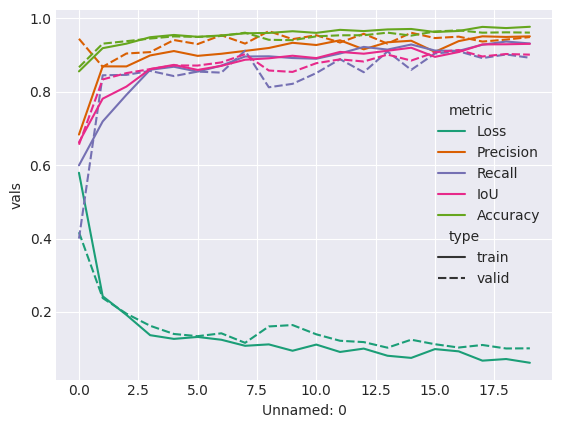

In [176]:
palette_div=sns.color_palette("Dark2", 10)
sns.set_palette(palette_div)
sns.lineplot(data=dfm,
             x="Unnamed: 0",
             y="vals",
             hue='metric',
             palette=palette_div,
             style='type')

<AxesSubplot:xlabel='Unnamed: 0', ylabel='vals'>

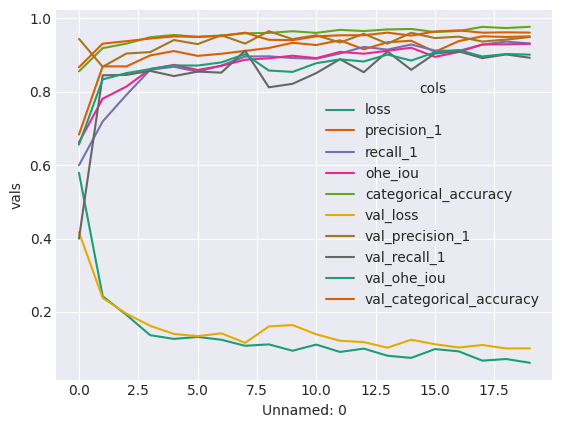

In [163]:
sns.lineplot(x="Unnamed: 0", y="vals", hue='cols', data=dfm)

<AxesSubplot:ylabel='recall_1'>

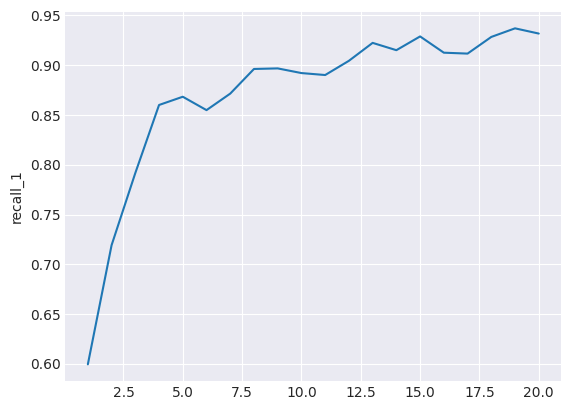

In [89]:
sns.lineplot(
    data=df_for_plot,
    x=range(1, len(loss) + 1), y='recall_1'

)